**General.Dataset**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fftn, fftshift
import cv2
import h5py

In [ ]:
f = h5py.File('file1000000.h5', 'r')
rss=f['reconstruction_rss'][()]
esc=f['reconstruction_esc'][()]
kspace=f['kspace'][()]
header=f['ismrmrd_header'][()]
example_kspace = kspace[20].copy() 
# data_kspace = kspace[25,: ,:]  


In [ ]:
def show_kspace(data, slice_nums):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plot_kspace(data[num])

def show_images(data, slice_nums):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums),  i + 1)
        plt.imshow(image_from_k(data[num]))

def image_from_k(slice_kspace):
    k_shift_kspace = np.fft.ifftshift(slice_kspace, axes=(-2, -1))  
    image_kspace = np.fft.ifft2(k_shift_kspace)  
    image_shift_kspace = np.fft.fftshift(image_kspace)  
    return np.abs(image_shift_kspace)
def plot_kspace(k_space):
    plt.imshow(np.log(np.abs(k_space) + 1e-9))


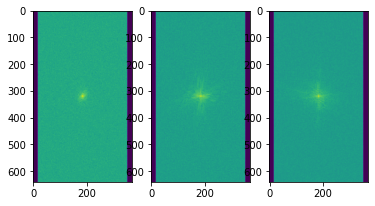

In [ ]:
show_kspace(kspace, [5, 15, 25])

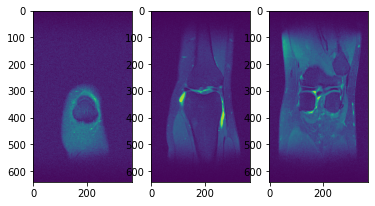

In [ ]:
show_images(kspace, [5, 15, 25])

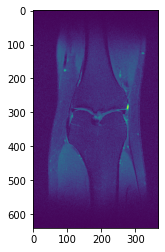

In [ ]:
plt.imshow(image_from_k(example_kspace))

**Details** **Extractor**

In [ ]:
def lh_pass_filter(ks,low_radius,high_radius):
  l_r = np.hypot(*ks.shape) / 2 * low_radius / 100
  h_r = np.hypot(*ks.shape) / 2 * high_radius / 100
  rows, cols = np.array(ks.shape, dtype=int)
  a, b = np.floor(np.array((rows, cols)) / 2).astype(np.int)
  y, x = np.ogrid[-a:rows - a, -b:cols - b]
  mask_h = x * x + y * y >= h_r * h_r
  mask_l = x * x + y * y <= l_r * l_r
  ks[mask_h] = 0
  ks[mask_l] = 0
  return ks

**Low Frequency**

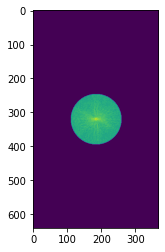

In [ ]:
new_kspace=lh_pass_filter(example_kspace,0,20)
plot_kspace(new_kspace)

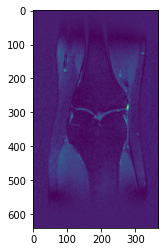

In [ ]:
plt.imshow(image_from_k(new_kspace))

**High Frequency**

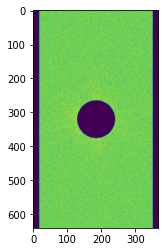

In [ ]:
new_kspace=lh_pass_filter(example_kspace.copy(),15,100)
plot_kspace(new_kspace)

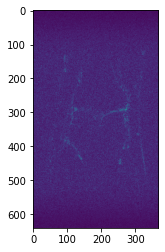

In [ ]:
plt.imshow(image_from_k(new_kspace))

In [ ]:
# f_reconstruction_esc = f['reconstruction_esc']  
# data_reconstruction_esc = f_reconstruction_esc[23,: ,:]
# plt.imshow(data_reconstruction_esc, cmap='YlGnBu_r')
# plt.show() 
# k_shift_reconstruction_esc = np.fft.ifftshift(data_reconstruction_esc, axes=(-2, -1))  
# image_reconstruction_esc = np.fft.ifft2(k_shift_reconstruction_esc)  
# image_shift_reconstruction_esc = np.fft.fftshift(image_reconstruction_esc)  
# plt.imshow( np.abs(image_shift_reconstruction_esc), cmap='YlGnBu_r')
# plt.show()
# f_reconstruction_rss = f['reconstruction_rss']  #(32, 320, 320)
# data_reconstruction_rss = f_reconstruction_rss[23,: ,:]  
# # plt.imshow(np.abs(data_reconstruction_rss), cmap='YlGnBu_r')
# plt.imshow(data_reconstruction_rss, cmap='YlGnBu_r') 
# k_shift_reconstruction_rss = np.fft.ifftshift(data_reconstruction_rss, axes=(-2, -1))  
# image_reconstruction_rss = np.fft.ifft2(k_shift_reconstruction_rss) 
# image_shift_reconstruction_rss = np.fft.fftshift(image_reconstruction_rss) 
# plt.imshow( np.abs(image_reconstruction_rss), cmap='YlGnBu_r')
# plt.show()


In [ ]:
# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)  # center
# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)
# mask = np.zeros((rows, cols, 2), np.uint8)
# r_out = 80
# r_in = 5
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
#                            ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
# mask[mask_area] = 1
# img_float32 = np.float32(img)
# #Fourier transform
# dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
# #shift transformation
# dft_shift = np.fft.fftshift(dft)
# # apply mask and inverse DFT
# fshift = dft_shift * mask
# fshift_mask_mag = 200 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
# magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# f_ishift = np.fft.ifftshift(fshift)
# img_back = cv2.idft(f_ishift)
# img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])